### 전기충전소 위치
- [출처 :공공데이터포털 ](https://www.data.go.kr/data/15013115/standard.do)
- 전국전기차충전소표준데이터

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium
import json
from IPython.display import Image
from collections import Counter
import re

%precision 3
pd.set_option('precision', 3)

%matplotlib inline

In [2]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [3]:
charging_station = pd.read_csv('전국전기차충전소표준데이터.csv', encoding='cp949')
charging_station.head(2)

,충전소명,충전소위치상세,설치시도명,휴점일,이용가능시작시각,이용가능종료시각,완속충전가능여부,급속충전가능여부,급속충전타입구분,완속충전기대수,...,주차료부과여부,소재지도로명주소,소재지지번주소,관리업체명,관리업체전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,평촌목련신동아아파트,"경기도 안양시 동안구 동안로 75 (호계동, 목련신동아아파트) 301동,901동~903동",경기도,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 동안로 75 (호계동, 목련신동아아파트) 301동,901동~903동",-,케이티,1522-0123,37.385,126.953,2020-08-11,3830000,경기도 안양시
1,신안메트로칸,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",경기도,-,00:00,24:00,Y,N,AC완속,1.0,...,N,"경기도 안양시 동안구 평촌대로 239 (비산동, 신안메트로칸) 신안메트로칸",-,케이티,1522-0123,37.393,126.954,2020-08-11,3830000,경기도 안양시


In [4]:
# 전처리
charging_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   충전소명      6699 non-null   object 
 1   충전소위치상세   6699 non-null   object 
 2   설치시도명     6699 non-null   object 
 3   휴점일       6699 non-null   object 
 4   이용가능시작시각  6699 non-null   object 
 5   이용가능종료시각  6699 non-null   object 
 6   완속충전가능여부  6699 non-null   object 
 7   급속충전가능여부  6699 non-null   object 
 8   급속충전타입구분  4760 non-null   object 
 9   완속충전기대수   5028 non-null   float64
 10  급속충전기대수   4656 non-null   float64
 11  주차료부과여부   6699 non-null   object 
 12  소재지도로명주소  6345 non-null   object 
 13  소재지지번주소   4955 non-null   object 
 14  관리업체명     6255 non-null   object 
 15  관리업체전화번호  4794 non-null   object 
 16  위도        6532 non-null   float64
 17  경도        6535 non-null   float64
 18  데이터기준일자   6699 non-null   object 
 19  제공기관코드    6699 non-null   object 
 20  제공기관명     6699 non-null   obje

In [5]:
charging_station.isnull().sum()

충전소명           0
충전소위치상세        0
설치시도명          0
휴점일            0
이용가능시작시각       0
이용가능종료시각       0
완속충전가능여부       0
급속충전가능여부       0
급속충전타입구분    1939
완속충전기대수     1671
급속충전기대수     2043
주차료부과여부        0
소재지도로명주소     354
소재지지번주소     1744
관리업체명        444
관리업체전화번호    1905
위도           167
경도           164
데이터기준일자        0
제공기관코드         0
제공기관명          0
dtype: int64

In [6]:
charging_station.describe()

,완속충전기대수,급속충전기대수,위도,경도
count,5028.000,4656.000,6532.000,6535.000
mean,0.907,0.846,36.349,127.482
std,1.965,0.953,1.251,0.891
min,0.000,0.000,33.166,126.019
25%,0.000,0.000,35.563,126.841
50%,1.000,1.000,36.615,127.114
75%,1.000,1.000,37.437,128.263
max,112.000,18.000,38.449,130.906


In [7]:
charging_station.drop_duplicates(inplace=True)

In [8]:
charging_station = charging_station.dropna(subset=['급속충전타입구분', '위도', '경도'])

In [9]:
charging_station['급속충전타입구분'].unique()

array(['AC완속', 'AC3상+DC차데모+DC차콤보', 'DC차데모+AC3상+DC콤보', 'DC콤보',
       'AC3상+DC차데모', '-', 'AC3상+DC', 'AC4상+DC차데모',
       '복합멀티형(DC차데모+AC3상+DC콤보)', 'AC3상+DC차데모+DC콤보', 'DC차데모+DC콤보', '트리플형',
       'AC3상+DC차데모 +DC콤보', 'DC차데모+AC3상', 'DC차데모,AC3상,DC콤보',
       'DC차데모,AC3상,DC콤보/DC콤보', 'DC차데모, AC3상, DC콤보', 'DC차데모, AC4상, DC콤보',
       'DC차데모, AC5상, DC콤보', '100kw', 'AC3상', 'B타입,C타입', 'AC3상,DC차데모,DC콤보',
       '초소형전기차 콘센트', '1', 'X', '급속', '완속', 'DC차데모, AC6상, DC콤보',
       'DC차데모, AC7상, DC콤보', 'AC상', '멀티(차데모+AC3+콤보)', 'AC3상, DC콤보, DC차데모',
       'DC차데모', '전차종 충전가능', 'DC차데모+AC2상+DC콤보',
       'AC3상 7핀+DC차데모 10핀+DC콤보 7핀', 'DC차데모, DC콤보',
       'DC차데모(기아자동차 차량 한정, 무료)', 'DC차데모+DC콤보+AC3상', 'AC3+DC', 'DC',
       '부발읍행정복지센터', 'Ac완속', 'DC차데모+AC4상+DC콤보', 'DC차데모+AC5상+DC콤보',
       'DC차데모+AC6상+DC콤보', 'Y', '멀티', '차데모', '차데모+AC3', 'AC4상+DC차데모+DC콤보',
       'AC5상+DC차데모+DC콤보', 'AC6상+DC차데모+DC콤보', 'AC7상+DC차데모+DC콤보',
       'AC9상+DC차데모+DC콤보', 'AC10상+DC차데모+DC콤보', 'AC11상+DC차데모+DC콤보',
       'AC12상+DC차데모+DC콤보', 'AC1

In [10]:
charging_station['급속충전타입구분'].value_counts()

DC차데모+AC3상+DC콤보      1483
AC완속                  973
DC콤보                  397
AC3상+DC차데모 +DC콤보      205
AC3상+DC차데모+DC콤보       120
                     ... 
초소형전기차 콘센트              1
AC7상+DC차데모+DC콤보         1
DC차데모,AC9상,DC콤보         1
DC차데모, AC6상, DC콤보       1
DC차데모+AC2상+DC콤보         1
Name: 급속충전타입구분, Length: 103, dtype: int64

In [11]:
# charging_station['급속충전타입구분'].astype(str)

충전기타입 01:DC 차데모 / 02: AC 완속 / 03: DC 차데모+AC 3상 / 04: DC 콤보 / 05: DC 차데모+DC 콤보 / 06: DC 차데모+AC 3상+DC 콤보 / 07: AC 3상  
[출처 : 한국환경공단](http://www.keco.or.kr/kr/sub/public/ev/step01/index.do)

In [12]:
# 1 DC차데모
# 2 AC완속 
# 7 AC3상
# 4 DC콤보

In [13]:
charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace('+', ' ')
charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace(',', ' ')
charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace('  ', ' ')

charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace('*', ' ')
charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace('/', ' ')

charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace('DC차데모', '1')
charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace('AC완속', '2')
charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace('AC3상', '7')
charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace('DC콤보', '4')
charging_station['급속충전타입구분'] = charging_station['급속충전타입구분'].str.replace(' ', '')


In [45]:
# charging_station = charging_station[charging_station['급속충전타입구분'].str.contains('[1,2,4,7]')]

In [14]:
charging_station['급속충전타입구분'].value_counts()

174       1587
2          973
4          397
714        331
14          80
          ... 
1AC8상4       1
41           1
AC상          1
해당없음         1
AC6상14       1
Name: 급속충전타입구분, Length: 82, dtype: int64

In [37]:
charging_station['DC차데모'] = charging_station['급속충전타입구분'].values == '1'
charging_station['AC완속'] = charging_station['급속충전타입구분'].values == '2'
charging_station['AC3상'] = charging_station['급속충전타입구분'].values == '7'
charging_station['DC콤보'] = charging_station['급속충전타입구분'].values == '4'
charging_station['모든타입'] = charging_station['급속충전타입구분'].values == '174'
charging_station['모든타입'] = charging_station['급속충전타입구분'].values == '714'
charging_station['모든타입'] = charging_station['급속충전타입구분'].values == '147'

In [38]:
charging_station =charging_station.drop(['충전소위치상세', '휴점일', '이용가능시작시각', '이용가능종료시각', '완속충전가능여부',
'급속충전가능여부', '급속충전타입구분', '완속충전기대수', '급속충전기대수', '주차료부과여부', '소재지도로명주소',
'소재지지번주소','관리업체명', '관리업체전화번호', '데이터기준일자', '제공기관코드', '제공기관명'], axis=1  )

In [39]:
charging_station

,충전소명,설치시도명,위도,경도,DC차데모,AC완속,AC3상,DC콤보,모든타입
0,평촌목련신동아아파트,경기도,37.385,126.953,False,True,False,False,False
1,신안메트로칸,경기도,37.393,126.954,False,True,False,False,False
4,평촌삼성래미안103동,경기도,37.393,126.979,False,True,False,False,False
5,호계일신아파트,경기도,37.384,126.949,False,True,False,False,False
6,평촌삼성래미안105동,경기도,37.393,126.979,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
6690,청학2동주민센터,부산광역시,35.092,129.066,False,False,False,False,False
6691,남항동행정복지센터,부산광역시,35.090,129.038,False,False,False,False,False
6692,동삼1동행정복지센터,부산광역시,35.075,129.068,False,False,False,False,False
6693,동삼3동행정복지센터,부산광역시,35.085,129.069,False,False,False,False,False


In [40]:
charging_station.isnull().sum()

충전소명     0
설치시도명    0
위도       0
경도       0
DC차데모    0
AC완속     0
AC3상     0
DC콤보     0
모든타입     0
dtype: int64

In [41]:
charging_station.describe()

,위도,경도
count,3941.000,3941.000
mean,36.384,127.572
std,1.156,0.911
min,33.206,126.048
25%,35.638,126.906
50%,36.535,127.150
75%,37.419,128.493
max,38.449,130.906


---

In [42]:
type_label = list(charging_station.columns[-5:])

In [43]:
type_label

['DC차데모', 'AC완속', 'AC3상', 'DC콤보', '모든타입']

In [44]:
true_count=0
true=[]

for name in type_label:
    for i in range(len(charging_station[name].values)):
        if charging_station[type_label[0]].values[i] == True:
            true_count+=1
    true.append(true_count)
    
print(true)

[29, 58, 87, 116, 145]


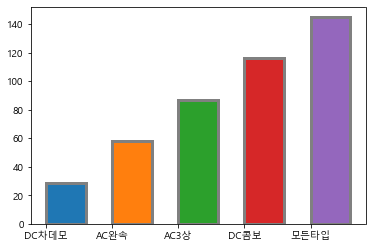

In [45]:
x =np.arange(len(type_label))
colors = ['C0','C1','C2','C3','C4']

plt.bar(x, true, width=0.6, align='edge', color=colors,
        edgecolor='gray', linewidth=3, tick_label=type_label,)

plt.show()

---

In [46]:
lat = charging_station['위도']
lon = charging_station['경도']

In [47]:
latAvg = charging_station['위도'].mean()
longAvg = charging_station['경도'].mean()

In [54]:
m=folium.Map([latAvg, longAvg], zoom_start=9, tiles='Stamen Terrain')
m

In [55]:
for i in charging_station.index: #한 줄씩 읽어 출력
    lat=charging_station.loc[i, '위도']
    lng=charging_station.loc[i, '경도']

    if charging_station['모든타입'][i]==True:
        folium.CircleMarker(
            location=[lat, lng],
            radius=3,
            fill=True,
            fill_color='blue',
            fill_opacity=0.5,
            weight=1,
            color='yellow'

            ).add_to(m)

    else:
        folium.CircleMarker(
            location=[lat, lng],
            radius=3,
            fill=True,
            fill_color='red',
            fill_opacity=0.5,
            weight=1,
            color='yellow'

            ).add_to(m)

In [56]:
m